In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [112]:

data = pd.read_csv("dirty_cafe_sales.csv")

Saving dirty_cafe_sales.csv to dirty_cafe_sales (3).csv


In [113]:
m = data["Item"].mode()
print(m)

0    Juice
Name: Item, dtype: object


In [114]:
data.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [116]:
#Numeric Columns: Convert Quantity, Price Per Unit, and Total Spent to numeric types:
data[['Quantity', 'Price Per Unit', 'Total Spent']] = data[['Quantity', 'Price Per Unit', 'Total Spent']].apply(pd.to_numeric, errors='coerce')

In [117]:

data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce', format='%Y-%m-%d')


In [118]:
#Replace "UNKNOWN" and "ERROR" with NaN for consistency:
data.replace(['UNKNOWN', 'ERROR', 'UnKNOWN'], pd.NA, inplace=True)

In [119]:
# List of numeric columns
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

# Fill missing values with the median of each column
fill_dict = {col: data[col].median() for col in numeric_cols}
data.fillna(value=fill_dict, inplace=True)


In [120]:
# List of categorical columns
categorical_cols = ['Item', 'Payment Method', 'Location']

# Fill missing values with the mode (most frequent value) of each column
for col in categorical_cols:
    mode_dict = {col: data[col].mode()[0] for col in categorical_cols}
data.fillna(mode_dict, inplace=True)  # ✅ Single inplace call, no chaining


In [121]:
# Categorical Data Standardization
categorical_cols = ['Item', 'Payment Method', 'Location']

for col in categorical_cols:
    data[col] = data[col].str.upper()


In [122]:
#Check for duplicate Transaction ID:
data.drop_duplicates(subset=['Transaction ID'], inplace=True)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [124]:
data.shape

(10000, 8)

In [125]:
data = data.dropna(subset=['Transaction Date'])


In [126]:
# See how many missing values exist in each column
print(data.isnull().sum())


Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [127]:
print(data.dtypes)


Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


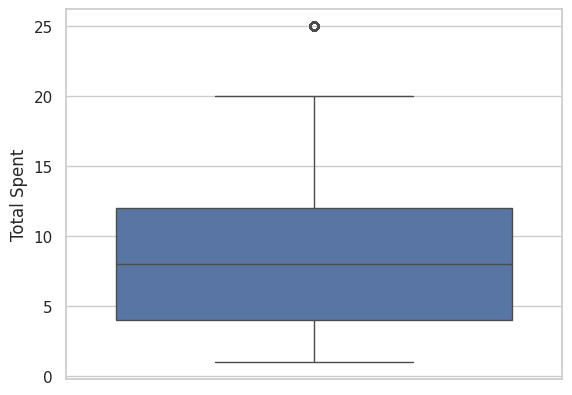

In [128]:
#detecting outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['Total Spent'])
plt.show()


In [129]:
import pandas as pd

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and filter out outliers using IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only the rows where the column is within bounds
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Check the cleaned dataset
print("✅ Cleaned dataset shape:", data.shape)


✅ Cleaned dataset shape: (9290, 8)


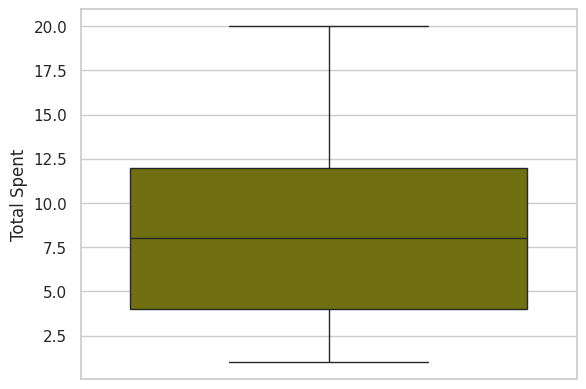

In [130]:
#outlier allready removed
sns.boxplot(data['Total Spent'],color="olive")
plt.show()

In [131]:
outlier_info = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = {
        'outlier_count': outliers.shape[0],
        'percent_of_data': 100 * outliers.shape[0] / data.shape[0]
    }

# Show summary
import pprint
pprint.pprint(outlier_info)


{'Price Per Unit': {'outlier_count': 0, 'percent_of_data': 0.0},
 'Quantity': {'outlier_count': 0, 'percent_of_data': 0.0},
 'Total Spent': {'outlier_count': 0, 'percent_of_data': 0.0}}


In [132]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"Value counts in '{col}':")
    print(data[col].value_counts())
    print('-' * 40)


Value counts in 'Transaction ID':
Transaction ID
TXN_6170729    1
TXN_1961373    1
TXN_4977031    1
TXN_4271903    1
TXN_7034554    1
              ..
TXN_3765707    1
TXN_2847255    1
TXN_8915701    1
TXN_9437049    1
TXN_7619095    1
Name: count, Length: 9290, dtype: int64
----------------------------------------
Value counts in 'Item':
Item
JUICE       2030
COFFEE      1123
CAKE        1082
SANDWICH    1075
SMOOTHIE    1048
COOKIE      1035
TEA         1027
SALAD        870
Name: count, dtype: int64
----------------------------------------
Value counts in 'Payment Method':
Payment Method
DIGITAL WALLET    5085
CREDIT CARD       2107
CASH              2098
Name: count, dtype: int64
----------------------------------------
Value counts in 'Location':
Location
TAKEAWAY    6498
IN-STORE    2792
Name: count, dtype: int64
----------------------------------------


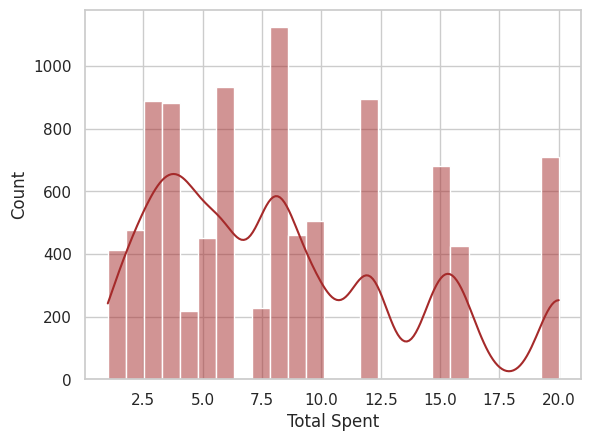

In [133]:
sns.histplot(data['Total Spent'], kde=True,color="brown")
plt.show()


In [134]:
#transform the variable using log transformation
data['Total Spent'] = np.log1p(data['Total Spent'])


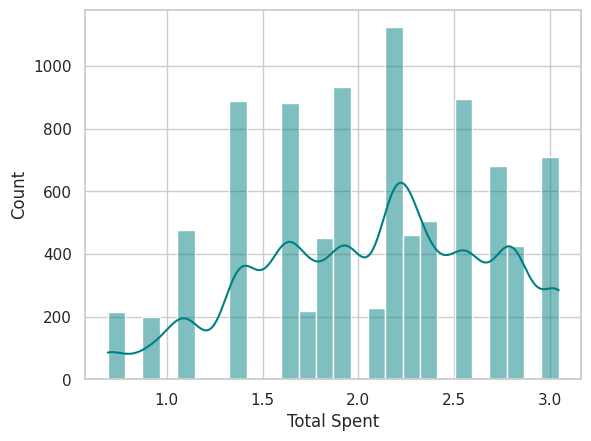

In [135]:
sns.histplot(data['Total Spent'], color="teal",kde=True)
plt.show()

In [136]:
print("Unique counts for categorical variables:")
print("• Item:", data['Item'].nunique())
print("• Location:", data['Location'].nunique())
print("• Payment Method:", data['Payment Method'].nunique())


Unique counts for categorical variables:
• Item: 8
• Location: 2
• Payment Method: 3


In [137]:
# Define the columns to clean
cat_cols = ['Item', 'Location', 'Payment Method']

# Replace rare categories (appearing less than 10 times) with "Other"
for col in cat_cols:
    counts = data[col].value_counts()
    rare_categories = counts[counts < 10].index
    data[col] = data[col].replace(rare_categories, 'Other')


In [138]:
print("\nUpdated counts of unique categories:")
print(data['Item'].value_counts())
print(data['Location'].value_counts())
print(data['Payment Method'].value_counts())



Updated counts of unique categories:
Item
JUICE       2030
COFFEE      1123
CAKE        1082
SANDWICH    1075
SMOOTHIE    1048
COOKIE      1035
TEA         1027
SALAD        870
Name: count, dtype: int64
Location
TAKEAWAY    6498
IN-STORE    2792
Name: count, dtype: int64
Payment Method
DIGITAL WALLET    5085
CREDIT CARD       2107
CASH              2098
Name: count, dtype: int64


In [139]:
"""Data Leakage
Why it matters: If your features include information not available at prediction time, your model will be unrealistically good and fail in production.

How to detect:
Manually inspect features. Anything from the future, or derived from the target, is leakage.

Solution:
Drop leaked columns:"""

# Drop the 'Revenue_after_discount' column if it's based on future data
if 'Revenue_after_discount' in data.columns:
    data = data.drop(columns=['Revenue_after_discount'])


In [140]:

print("Duplicate rows:", data.duplicated().sum())


Duplicate rows: 0


In [141]:
data = data.drop_duplicates()


In [142]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,COFFEE,2.0,2.0,1.609438,CREDIT CARD,TAKEAWAY,2023-09-08
1,TXN_4977031,CAKE,4.0,3.0,2.564949,CASH,IN-STORE,2023-05-16
2,TXN_4271903,COOKIE,4.0,1.0,2.197225,CREDIT CARD,IN-STORE,2023-07-19
3,TXN_7034554,SALAD,2.0,5.0,2.397895,DIGITAL WALLET,TAKEAWAY,2023-04-27
4,TXN_3160411,COFFEE,2.0,2.0,1.609438,DIGITAL WALLET,IN-STORE,2023-06-11


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler  # or MinMaxScaler

 # 🔁 Uncomment and provide file if needed
data.rename(columns=lambda x: x.strip(), inplace=True)

# STEP 2: Aggregate statistics by item
item_stats = data.groupby('Item').agg({
    'Quantity': 'sum',
    'Total Spent': 'sum',
    'Transaction ID': 'count'  # Frequency
}).rename(columns={'Transaction ID': 'Frequency'}).reset_index()

# STEP 3: Feature scaling
features = ['Quantity', 'Frequency', 'Total Spent']
scaler = StandardScaler()  # Or use MinMaxScaler() if you prefer 0–1 range
X_scaled = scaler.fit_transform(item_stats[features])

# STEP 5: Final model with best k (e.g., k=3 based on elbow/silhouette)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
item_stats['Cluster'] = kmeans.fit_predict(X_scaled)

# Final silhouette score
final_silhouette = silhouette_score(X_scaled, item_stats['Cluster'])
print(f"\n✅ Final Silhouette Score (k={optimal_k}): {final_silhouette:.2f}")

# STEP 6: Cluster summary
cluster_summary = item_stats.groupby('Cluster').agg({
    'Quantity': 'mean',
    'Frequency': 'mean',
    'Total Spent': 'mean',
    'Item': 'count'
}).rename(columns={'Item': 'Num_Items'}).reset_index()

print("\n📦 Cluster Summary:")
print(cluster_summary)



✅ Final Silhouette Score (k=3): 0.36

📦 Cluster Summary:
   Cluster  Quantity  Frequency  Total Spent  Num_Items
0        0    3109.0     1031.0  1549.179210          2
1        1    6038.0     2030.0  4335.893904          1
2        2    3074.0     1039.6  2368.843771          5


In [144]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# STEP 2: Ensure clean column names
data.rename(columns=lambda x: x.strip(), inplace=True)

# STEP 3: Group by 'Item' and compute popularity metrics
item_stats = data.groupby('Item').agg({
    'Quantity': 'sum',
    'Total Spent': 'sum',
    'Transaction ID': 'count'  # Frequency of purchase
}).rename(columns={'Transaction ID': 'Frequency'}).reset_index()

# STEP 4: Clustering with KMeans
X = item_stats[['Quantity', 'Frequency', 'Total Spent']]
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
item_stats['Cluster'] = kmeans.fit_predict(X)

# STEP 5: Performance Metrics

silhouette = silhouette_score(X, item_stats['Cluster'])

print("📊 Clustering Performance:")

print(f"Silhouette Score: {silhouette:.2f} (closer to 1 = better clusters)")

# STEP 6: Cluster Summary
cluster_summary = item_stats.groupby('Cluster').agg({
    'Quantity': 'mean',
    'Frequency': 'mean',
    'Total Spent': 'mean',
    'Item': 'count'
}).rename(columns={'Item': 'Num_Items'}).reset_index()

print("\n📦 Cluster Summary:")
print(cluster_summary)


📊 Clustering Performance:
Silhouette Score: 0.35 (closer to 1 = better clusters)

📦 Cluster Summary:
   Cluster  Quantity  Frequency  Total Spent  Num_Items
0        0    3109.0     1031.0  1549.179210          2
1        1    6038.0     2030.0  4335.893904          1
2        2    3074.0     1039.6  2368.843771          5


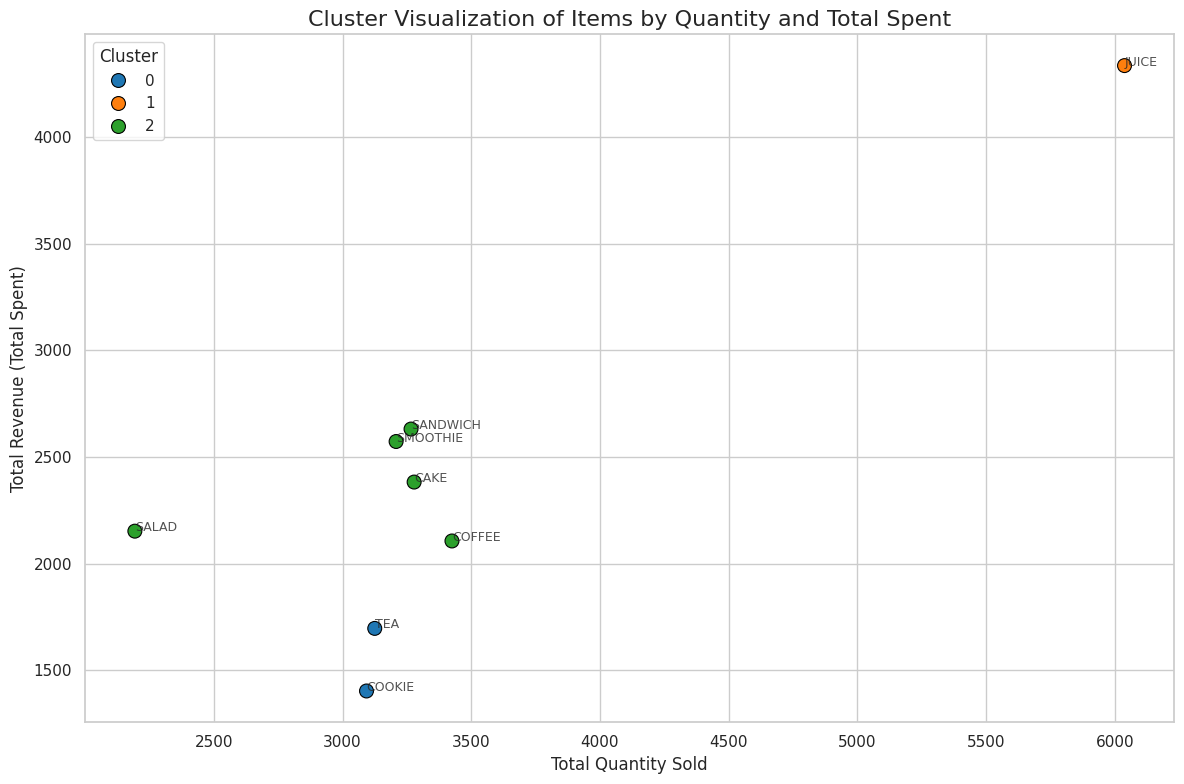

In [145]:

# Plot setup
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot colored by cluster
sns.scatterplot(
    data=item_stats,
    x='Quantity',
    y='Total Spent',
    hue='Cluster',
    palette='tab10',
    s=100,
    edgecolor='black',
    legend='full'
)

# Add item labels to each point
for i in range(item_stats.shape[0]):
    item = item_stats.loc[i, 'Item']
    x = item_stats.loc[i, 'Quantity']
    y = item_stats.loc[i, 'Total Spent']
    plt.text(x + 0.5, y, item, fontsize=9, alpha=0.8)

plt.title('Cluster Visualization of Items by Quantity and Total Spent', fontsize=16)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Revenue (Total Spent)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
